# Playground s5e4 - Predict Podcast Listening Time

## EDA

In [58]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

df_train = pd.read_csv('../data/s5e4/train.csv')
df_test = pd.read_csv('../data/s5e4/test.csv')
df_train.head(10)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
5,5,Fitness First,Episode 19,26.54,Health,48.96,Saturday,Afternoon,NaN,3.0,Positive,22.77047
6,6,Criminal Minds,Episode 47,69.83,True Crime,35.82,Sunday,Night,39.02,0.0,Neutral,64.75024
7,7,News Roundup,Episode 44,48.52,News,44.99,Thursday,Night,20.12,0.0,Positive,22.37517
8,8,Daily Digest,Episode 32,105.87,News,69.81,Monday,Evening,NaN,2.0,Neutral,68.00124
9,9,Music Matters,Episode 81,NaN,Music,82.18,Thursday,Night,59.72,3.0,Neutral,45.94761


In [59]:
df_train.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [60]:
df_test.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads
count,250000.000000,2.212640e+05,250000.000000,201168.000000,250000.000000
mean,874999.500000,4.192987e+02,59.716491,52.192796,1.355852
std,72168.927986,1.668545e+05,22.880028,28.445034,4.274399
min,750000.000000,2.470000e+00,2.490000,0.000000,0.000000
25%,812499.750000,3.578000e+01,39.250000,28.320000,0.000000
50%,874999.500000,6.397000e+01,59.900000,53.360000,1.000000
75%,937499.250000,9.415000e+01,79.390000,76.560000,2.000000
max,999999.000000,7.848626e+07,117.760000,116.820000,2063.000000


In [3]:
df_train.isna().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [4]:
df_train.dtypes

id                               int64
Podcast_Name                    object
Episode_Title                   object
Episode_Length_minutes         float64
Genre                           object
Host_Popularity_percentage     float64
Publication_Day                 object
Publication_Time                object
Guest_Popularity_percentage    float64
Number_of_Ads                  float64
Episode_Sentiment               object
Listening_Time_minutes         float64
dtype: object

In [5]:
df_test.isna().sum()

id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28736
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64

In [6]:
df_test.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads
count,250000.000000,2.212640e+05,250000.000000,201168.000000,250000.000000
mean,874999.500000,4.192987e+02,59.716491,52.192796,1.355852
std,72168.927986,1.668545e+05,22.880028,28.445034,4.274399
min,750000.000000,2.470000e+00,2.490000,0.000000,0.000000
25%,812499.750000,3.578000e+01,39.250000,28.320000,0.000000
50%,874999.500000,6.397000e+01,59.900000,53.360000,1.000000
75%,937499.250000,9.415000e+01,79.390000,76.560000,2.000000
max,999999.000000,7.848626e+07,117.760000,116.820000,2063.000000


In [7]:
df_train["Episode_Title"].str.startswith("Episode").sum()

np.int64(750000)

['True Crime' 'Comedy' 'Education' 'Technology' 'Health' 'News' 'Music'
 'Sports' 'Business' 'Lifestyle']


<Axes: xlabel='Genre'>

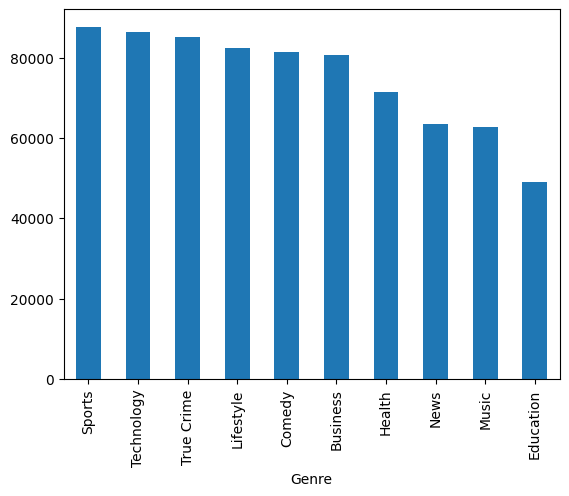

In [8]:
print(df_train["Genre"].unique())
df_train["Genre"].value_counts().plot(kind='bar')

<Axes: >

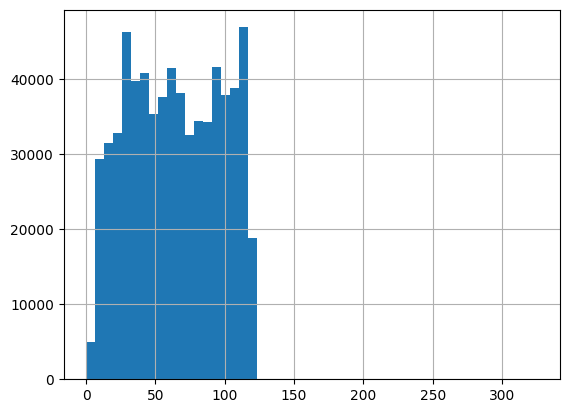

In [41]:
df_train["Episode_Length_minutes"].hist(bins=50)

In [9]:
df1 = df_train[~df_train["Episode_Length_minutes"].isna()]
df_has_mins = df1[df1["Listening_Time_minutes"] < df1["Episode_Length_minutes"]]
df_has_mins.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,658716.000000,658716.000000,658716.000000,535518.000000,658715.000000,658716.000000
mean,375121.639936,64.661334,59.863130,52.235393,1.353629,45.768662
std,216522.305455,32.901685,22.860363,28.517277,1.156911,27.212214
min,1.000000,2.970000,1.300000,0.000000,0.000000,0.000000
25%,187686.750000,35.960000,39.470000,28.240000,0.000000,23.350960
50%,375161.500000,63.980000,60.070000,53.640000,1.000000,43.786260
75%,562678.250000,94.150000,79.500000,76.707500,2.000000,65.194983
max,749999.000000,325.240000,119.460000,115.620000,103.910000,119.970000


In [57]:
df_test.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads
count,250000.000000,2.212640e+05,250000.000000,201168.000000,250000.000000
mean,874999.500000,4.192987e+02,59.716491,52.192796,1.355852
std,72168.927986,1.668545e+05,22.880028,28.445034,4.274399
min,750000.000000,2.470000e+00,2.490000,0.000000,0.000000
25%,812499.750000,3.578000e+01,39.250000,28.320000,0.000000
50%,874999.500000,6.397000e+01,59.900000,53.360000,1.000000
75%,937499.250000,9.415000e+01,79.390000,76.560000,2.000000
max,999999.000000,7.848626e+07,117.760000,116.820000,2063.000000


(0.0, 150.0)

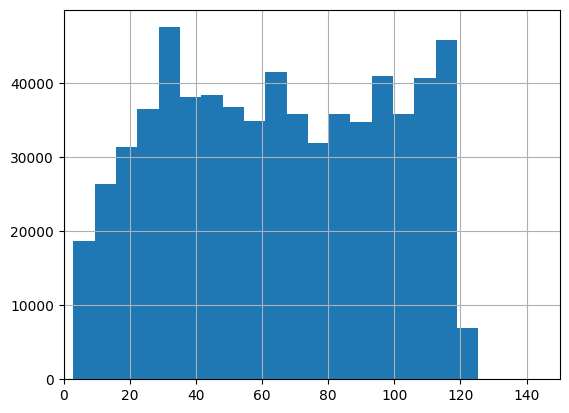

In [10]:
df_has_mins["Episode_Length_minutes"].hist(bins=50)
plt.xlim([0,150])

<Axes: >

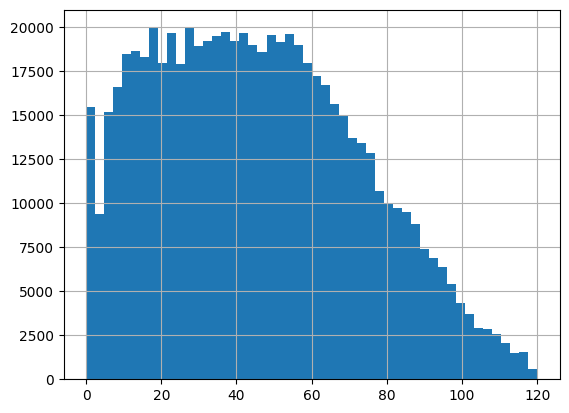

In [11]:
df_has_mins["Listening_Time_minutes"].hist(bins=50)

<Axes: >

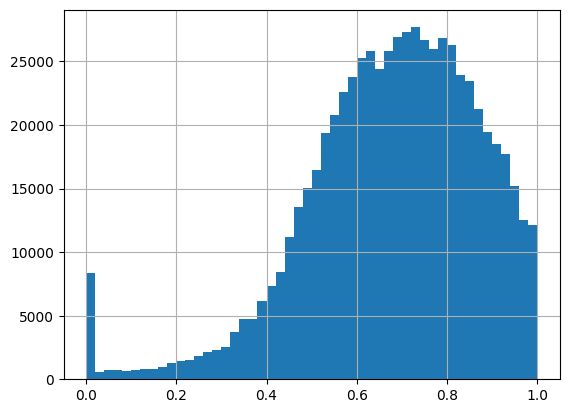

In [12]:
s = df_has_mins["Listening_Time_minutes"] / (df_has_mins["Episode_Length_minutes"] + 1e-8)
s.hist(bins=50)

<Axes: >

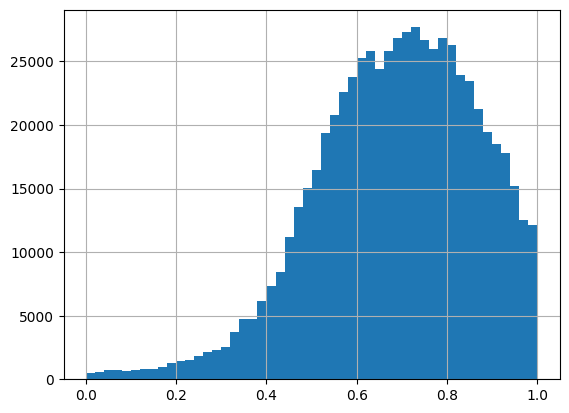

In [13]:
s = s[s > 1e-8]
s.hist(bins=50)

In [14]:
df_listen_longer = df1[df1["Listening_Time_minutes"] > df1["Episode_Length_minutes"] * 1.01]
s = df_listen_longer["Listening_Time_minutes"] / (df_listen_longer["Episode_Length_minutes"] + 1)
s.describe()

count    643.000000
mean       1.586632
std        3.481266
min        0.848854
25%        0.988121
50%        1.004815
75%        1.032034
max       52.133929
dtype: float64

<Axes: >

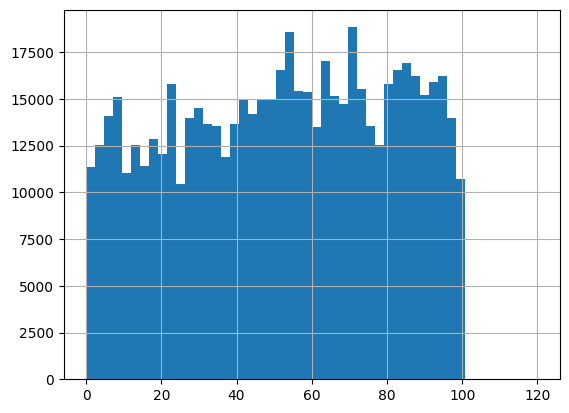

In [15]:
df_train["Guest_Popularity_percentage"].hist(bins=50)

<Axes: xlabel='Publication_Day'>

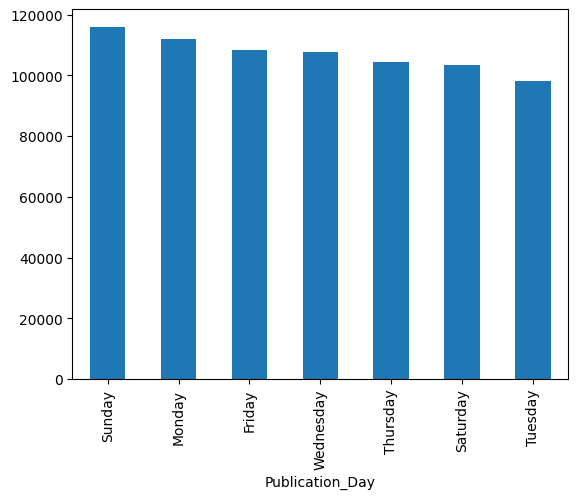

In [16]:
df_train["Publication_Day"].value_counts().plot(kind='bar')

Text(0, 0.5, 'Mean target')

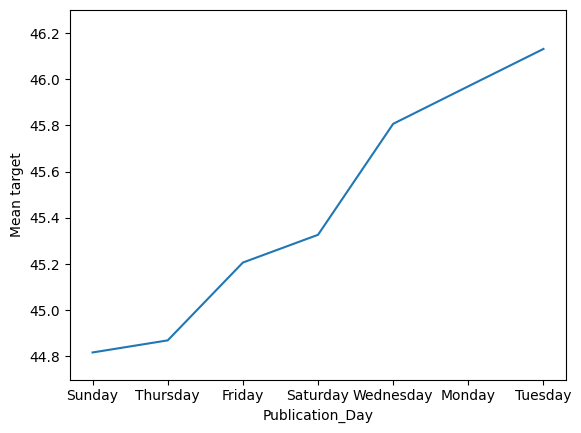

In [17]:
df_train.groupby("Publication_Day")["Listening_Time_minutes"].mean().sort_values().plot()
plt.ylim([44.7,46.3])
plt.ylabel("Mean target")

### Summary:
1. All episode titles start with 'Episode'
2. 10 genres
3. Outliers 1: Some samples have listening time > total time. 216 is 5% greater, 643 is 1% greater.
4. Outliers 2: Some samples have listening time = 0; removing them produces a smoother histogram
5. Target has a strong correlation with length, but length has NaN in both train and test data
6. There are some very weird samples in test. One has 7e7 length, and one has 2063 ads.

## Imputation of Length
Since column length is very important, and we probably want to predict target / length instead of target itself, we need to impute length.

In [33]:
target = "Listening_Time_minutes"
target_impute = "Episode_Length_minutes"
df1 = df_train.drop(target, axis=1)
df_impute_combined = pd.concat([df1, df_test]).reset_index(drop=True)
df_impute_combined["Number_of_Ads"] = df_impute_combined["Number_of_Ads"].fillna(0)
df_impute_combined = df_impute_combined.drop("Podcast_Name", axis=1)
df_impute_combined["Episode_Title"] = df_impute_combined["Episode_Title"].str.replace("Episode ", "", regex=False).astype(int)
for col in df_impute_combined.columns:
    if df_impute_combined[col].dtype == "object":
        df_impute_combined[col] = df_impute_combined[col].astype("category")    
df_impute_combined["Guest_Popularity_percentage_isna"] = df_impute_combined["Guest_Popularity_percentage"].isna().astype(int)
df_impute_combined["Guest_Popularity_percentage"] = df_impute_combined["Guest_Popularity_percentage"].fillna(0)
df_impute_combined.head(10)

,id,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Guest_Popularity_percentage_isna
0,0,98,NaN,True Crime,74.81,Thursday,Night,0.00,0.0,Positive,1
1,1,26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,0
2,2,16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,0
3,3,45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,0
4,4,86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,0
5,5,19,26.54,Health,48.96,Saturday,Afternoon,0.00,3.0,Positive,1
6,6,47,69.83,True Crime,35.82,Sunday,Night,39.02,0.0,Neutral,0
7,7,44,48.52,News,44.99,Thursday,Night,20.12,0.0,Positive,0
8,8,32,105.87,News,69.81,Monday,Evening,0.00,2.0,Neutral,1
9,9,81,NaN,Music,82.18,Thursday,Night,59.72,3.0,Neutral,0


In [56]:
df1 = df_impute_combined.copy()
df1_nona = df1[~df1[target_impute].isna()]
df1_nona[df1_nona["Publication_Day"] == "Monday"].describe()
# df1["Genre"] = df1["Genre"].map(df1_nona.groupby("Genre")[target_impute].mean())
# df1["Publication_Day"] = df1["Publication_Day"].map(df1_nona.groupby("Publication_Day")[target_impute].mean())
# df1["Publication_Time"] = df1["Publication_Time"].map(df1_nona.groupby("Publication_Time")[target_impute].mean())
# df1["Episode_Title"] = df1["Episode_Title"].map(df1_nona.groupby("Episode_Title")[target_impute].mean())
# df1["Episode_Sentiment"] = df1["Episode_Sentiment"].map(df1_nona.groupby("Episode_Sentiment")[target_impute].mean())
# df1 = df1.drop("id", axis=1)
# df_impute_train = df1[~df1[target_impute].isna()]
# df_impute_test = df1[df1[target_impute].isna()]
# df_impute_train.head(10)

,id,Episode_Title,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Guest_Popularity_percentage_isna
count,132376.000000,132376.000000,1.323760e+05,132376.000000,132376.000000,132376.000000,132376.000000
mean,500071.669525,51.084215,6.580984e+02,59.696355,42.399638,1.340462,0.180901
std,288579.953637,28.224089,2.157191e+05,22.862635,32.685327,1.105046,0.384938
min,3.000000,1.000000,2.470000e+00,1.890000,0.000000,0.000000,0.000000
25%,251299.500000,27.000000,3.699000e+01,39.260000,8.980000,0.000000,0.000000
50%,499699.500000,52.000000,6.471000e+01,59.770000,42.450000,1.000000,0.000000
75%,750402.250000,75.000000,9.408000e+01,79.190000,71.110000,2.000000,0.000000
max,999989.000000,100.000000,7.848626e+07,119.460000,116.820000,3.000000,1.000000


In [38]:
df_impute_train.dtypes

Episode_Title                       float64
Episode_Length_minutes              float64
Genre                               float64
Host_Popularity_percentage          float64
Publication_Day                     float64
Publication_Time                    float64
Guest_Popularity_percentage         float64
Number_of_Ads                       float64
Episode_Sentiment                   float64
Guest_Popularity_percentage_isna      int64
dtype: object

In [39]:
from sklearn.model_selection import KFold, GridSearchCV
from xgboost import XGBRegressor


n_folds = 10
FOLDS = KFold(n_splits=n_folds, shuffle=True, random_state=42)

for i, (train_index, val_index) in enumerate(FOLDS.split(df_impute_train)):
    print(f"Fold {i+1}/{n_folds}")
    df_train_fold = df_impute_train.iloc[train_index]
    df_val_fold = df_impute_train.iloc[val_index]

    x_train = df_train_fold.drop(target_impute, axis=1)
    y_train = df_train_fold[target_impute]
    x_val = df_val_fold.drop(target_impute, axis=1)
    y_val = df_val_fold[target_impute]

    model = XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=3, random_state=42)
    model.fit(x_train, y_train)

    val_preds = model.predict(x_val)
    print(y_val)
    print(val_preds)
    print(f"Validation MAE: {np.mean(np.abs(y_val - val_preds)):.2f}")



Fold 1/10
1         119.80
8         105.87
14         81.45
20         54.67
22         66.22
           ...  
999916     58.52
999949     38.91
999967     91.29
999984     96.02
999997     12.11
Name: Episode_Length_minutes, Length: 88418, dtype: float64
[61.450523 66.55043  67.964    ... 61.782173 67.53587  61.189476]
Validation MAE: 454.16
Fold 2/10
16         78.47
19         51.60
26        110.70
39         39.04
64         81.13
           ...  
999960     36.65
999985    115.65
999986     44.26
999991    103.69
999998    113.46
Name: Episode_Length_minutes, Length: 88417, dtype: float64
[61.54438  69.12767  65.25907  ... 68.340744 70.56982  55.103523]
Validation MAE: 409.47
Fold 3/10


KeyboardInterrupt: 